# Support Vector Regression

There are three different implementations of Support Vector Regression: 
SVR, NuSVR and LinearSVR. 

LinearSVR provides a faster implementation than SVR but only considers linear kernels, 
while NuSVR implements a slightly different formulation than SVR and LinearSVR. 

See Implementation details for further details.


In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

import numpy as np
boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

X=X[y<50]
y=y[y<50]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

## The Optimization Problem

$$
\begin{align}\begin{aligned}\min_ {w, b, \zeta, \zeta^*} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\\begin{split}\textrm {subject to } & y_i - (w^T \phi (x_i) + b) \leq \varepsilon + \zeta_i,\\
                      & (w^T \phi (x_i) + b) - y_i \leq \varepsilon + \zeta_i^*,\\
                      & \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}
$$

where $\phi$ is the kernel map that can be chosen as 
 - linear: $\langle x, x'\rangle$
 - poly: $(\gamma \langle x, x'\rangle + r)^d$ where $\gamma,\, d ,\, r$ are specified by keyword gamma, degree and coef0 respectively.
 - rbf - radial basis function: $\exp(-\gamma \|x-x'\|^2)$
 - neural networks (sigmoid): $\tanh(\gamma \langle x,x'\rangle + r)$

In [2]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.svm import SVR
import numpy as np

regressor = SVR()
parameters = {'C': [10],
             'epsilon': [0.01],
             'gamma':['auto'],
             'kernel': ['linear', 'poly','rbf'],
             'degree': [2,3,5]
             }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 10,scoring ='neg_mean_absolute_error') #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START C=10, degree=2, epsilon=0.01, gamma=auto, kernel=linear.....
[CV 1/3; 1/9] END C=10, degree=2, epsilon=0.01, gamma=auto, kernel=linear;, score=-3.322 total time=   0.0s
[CV 2/3; 1/9] START C=10, degree=2, epsilon=0.01, gamma=auto, kernel=linear.....
[CV 2/3; 1/9] END C=10, degree=2, epsilon=0.01, gamma=auto, kernel=linear;, score=-2.857 total time=   0.0s
[CV 3/3; 1/9] START C=10, degree=2, epsilon=0.01, gamma=auto, kernel=linear.....
[CV 3/3; 1/9] END C=10, degree=2, epsilon=0.01, gamma=auto, kernel=linear;, score=-2.748 total time=   0.0s
[CV 1/3; 2/9] START C=10, degree=2, epsilon=0.01, gamma=auto, kernel=poly.......
[CV 1/3; 2/9] END C=10, degree=2, epsilon=0.01, gamma=auto, kernel=poly;, score=-3.653 total time=   0.0s
[CV 2/3; 2/9] START C=10, degree=2, epsilon=0.01, gamma=auto, kernel=poly.......
[CV 2/3; 2/9] END C=10, degree=2, epsilon=0.01, gamma=auto, kernel=poly;, score=-3.558 total time=   0.0s

In [3]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -2.119690 using {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
-2.975844 (0.249126) with: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
-3.582561 (0.050199) with: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
-2.119690 (0.253068) with: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
-2.975844 (0.249126) with: {'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
-2.967847 (0.425468) with: {'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
-2.119690 (0.253068) with: {'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
-2.975844 (0.249126) with: {'C': 10, 'degree': 5, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
-3.771087 (0.784246) with: {'C': 10, 'degree': 5, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
-2.119690 (0.253068) with: {'C': 10, 'degree': 5, 'ep

-1.9474782420700867

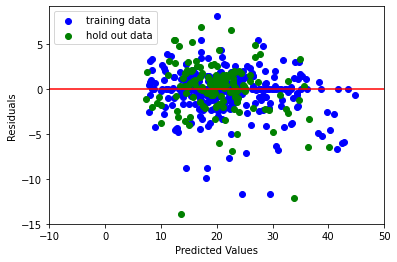

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [5]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  1.460704781383858
MSE train:  5.620555036871476
RMSE train:  2.3707709794224066
r2:  0.9556748125856116
MAE test:  1.9474782420700867
MSE test:  8.06210173582604
RMSE test:  2.8393840416234717
r2:  0.9200318000820057
